In [11]:
import pandas as pd



In [12]:
import snowflake.connector

In [13]:
con = snowflake.connector.connect(
    user='ritik',
    password='^$kAt54%Fe7P',
    account='ha24879.us-east-1',
    
    
)

In [14]:
conn = snowflake.connector.connect(
                user='ritik',
                password='^$kAt54%Fe7P',
                account='ha24879.us-east-1',
                warehouse='READ_WH',
                database='ALLY_USERS_DB',
                schema='ANALYTICS'
                )

In [10]:
sql="""SELECT DISTINCT organization_',b.ORGANIZATION_ID)) AS ORGANIZATION_ID  FROM "SEGMENT_DB"."OKR"."TRACKS" AS a
INNER JOIN "ALLY_USERS_DB"."PRODUCTION_VIEW"."USERS" AS b ON a.USER_ID=concat('user_',b.ID)
INNER JOIN "ALLY_USERS_DB"."ENGINEERING"."ACCOUNT_LEVEL_VIEW" AS c ON concat('organization_',b.ORGANIZATION_ID)=c.ORG_ID
WHERE DATEDIFF(HOUR,c.TRIAL_START,a.ORIGINAL_TIMESTAMP)<=24;"""

In [11]:
sql1='SELECT ORG_ID,TRIAL_START FROM "ALLY_USERS_DB"."ENGINEERING"."ACCOUNT_LEVEL_VIEW" WHERE TRIAL_START IS NULL;'

In [15]:
sql='USE WAREHOUSE READ_WH;'

In [16]:
con.cursor().execute("USE ROLE SYSADMIN")

In [17]:
con.cursor().execute(sql)

In [18]:
con.cursor().execute(sql1)

NameError: name 'sql1' is not defined

In [19]:
data1= con.cursor().execute(sql).fetch_pandas_all()

NotSupportedError: Unknown error

In [57]:
results

,ORG_ID,TRIAL_START
0,organization_9179,None
1,organization_8449,None
2,organization_6352,None
3,organization_10757,None
4,organization_4681,None
...,...,...
7963,organization_3196,None
7964,organization_5759,None
7965,organization_7432,None
7966,organization_2684,None


In [64]:
data1

,ORGANIZATION_ID
0,organization_5470
1,organization_7543
2,organization_7534
3,organization_7589
4,organization_9356
...,...
1266,organization_4973
1267,organization_6085
1268,organization_7604
1269,organization_7606


In [21]:
sql_f="""SELECT b.ORGANIZATION_ID,b.id,a.EVENT,a.EVENT_TEXT,a.ORIGINAL_TIMESTAMP FROM "SEGMENT_DB"."OKR"."TRACKS" AS a
INNER JOIN "ALLY_USERS_DB"."PRODUCTION_VIEW"."USERS" AS b ON a.USER_ID=concat('user_',b.ID)"""


In [22]:
initial_df= con.cursor().execute(sql_f).fetch_pandas_all()

In [23]:
len(initial_df)

4141903

In [24]:
df=initial_df

In [25]:
df=df.sort_values(by=['ORGANIZATION_ID'])

In [26]:
df=df.dropna()

In [27]:
import pickle

In [28]:
pickle_out = open("F:\df_1.pickle","wb")
pickle.dump(df, pickle_out)
pickle_out.close()

In [29]:
pickle_in = open("F:\df_1.pickle","rb")
df = pickle.load(pickle_in)

In [30]:
df

,ORGANIZATION_ID,ID,EVENT,EVENT_TEXT,ORIGINAL_TIMESTAMP
1534084,1.0,40,slack_digest_update_trigger,Slack Digest Update Trigger,2020-03-30 08:01:52.377
1530168,1.0,42,slack_digest_update_trigger,Slack Digest Update Trigger,2020-03-30 16:10:08.120
2452288,1.0,70,viewed_okrs,Viewed OKRs,2020-07-06 12:18:12.659
1951666,1.0,1,reactivated_subscription,Reactivated Subscription,2019-12-11 03:54:31.757
4077460,1.0,40,slack_digest_update_trigger,Slack Digest Update Trigger,2020-05-25 08:09:24.600
...,...,...,...,...,...
3859963,10935.0,97822,billing_plan_changed,BillingPlan Changed,2020-07-24 06:01:27.867
3857792,10935.0,97822,added_objective,Added Objective,2020-07-24 06:03:45.953
3862436,10935.0,97822,viewed_confirm_trial,Viewed Confirm Trial,2020-07-24 06:01:03.653
3859367,10935.0,97822,viewed_okrs,Viewed OKRs,2020-07-24 06:01:36.536


In [31]:
df['ID']

1534084       40
1530168       42
2452288       70
1951666        1
4077460       40
           ...  
3859963    97822
3857792    97822
3862436    97822
3859367    97822
3860897    97822
Name: ID, Length: 4137342, dtype: int32

In [32]:
df.ORGANIZATION_ID = df.ORGANIZATION_ID.astype('int64') 

In [33]:
pf=df[df['EVENT']=='user_sign_up_successful']

In [34]:
df

,ORGANIZATION_ID,ID,EVENT,EVENT_TEXT,ORIGINAL_TIMESTAMP
1534084,1,40,slack_digest_update_trigger,Slack Digest Update Trigger,2020-03-30 08:01:52.377
1530168,1,42,slack_digest_update_trigger,Slack Digest Update Trigger,2020-03-30 16:10:08.120
2452288,1,70,viewed_okrs,Viewed OKRs,2020-07-06 12:18:12.659
1951666,1,1,reactivated_subscription,Reactivated Subscription,2019-12-11 03:54:31.757
4077460,1,40,slack_digest_update_trigger,Slack Digest Update Trigger,2020-05-25 08:09:24.600
...,...,...,...,...,...
3859963,10935,97822,billing_plan_changed,BillingPlan Changed,2020-07-24 06:01:27.867
3857792,10935,97822,added_objective,Added Objective,2020-07-24 06:03:45.953
3862436,10935,97822,viewed_confirm_trial,Viewed Confirm Trial,2020-07-24 06:01:03.653
3859367,10935,97822,viewed_okrs,Viewed OKRs,2020-07-24 06:01:36.536


In [35]:
pf

,ORGANIZATION_ID,ID,EVENT,EVENT_TEXT,ORIGINAL_TIMESTAMP
1221962,4,73232,user_sign_up_successful,User Sign-Up Successful,2020-02-05 14:35:55.496
3433919,4,81289,user_sign_up_successful,User Sign-Up Successful,2020-04-07 22:03:13.231
1651264,6,94211,user_sign_up_successful,User Sign-Up Successful,2020-07-10 17:49:59.031
1706636,6,54719,user_sign_up_successful,User Sign-Up Successful,2019-12-11 18:12:58.011
2873490,6,77856,user_sign_up_successful,User Sign-Up Successful,2020-03-10 00:01:15.120
...,...,...,...,...,...
3861434,10930,97808,user_sign_up_successful,User Sign-Up Successful,2020-07-23 23:46:21.678
3862270,10932,97817,user_sign_up_successful,User Sign-Up Successful,2020-07-24 05:08:53.344
3857323,10933,97820,user_sign_up_successful,User Sign-Up Successful,2020-07-24 05:33:31.102
3858119,10934,97821,user_sign_up_successful,User Sign-Up Successful,2020-07-24 05:44:16.187


In [36]:
pf=pf.sort_values(by=['ORGANIZATION_ID'])

In [37]:
len(pf)

19048

In [38]:
def myFunc(e):
  return e[0]

In [39]:
pql={}
for i in range(0,len(pf)):
  if pf.iloc[i]['ORGANIZATION_ID'] in pql.keys():
    ###arr=
    pql[pf.iloc[i]['ORGANIZATION_ID']].append([pf.iloc[i]['ORIGINAL_TIMESTAMP'],pf.iloc[i]['ID']])
    ###arr.sort(key=myFunc)
  else:
    pql[pf.iloc[i]['ORGANIZATION_ID']]=[[pf.iloc[i]['ORIGINAL_TIMESTAMP'],pf.iloc[i]['ID']]]

In [40]:
len(pql)

5385

In [41]:
pql[4]

[[Timestamp('2020-02-05 14:35:55.496000'), 73232],
 [Timestamp('2020-04-07 22:03:13.231000'), 81289]]

In [42]:
pql

{4: [[Timestamp('2020-02-05 14:35:55.496000'), 73232],
  [Timestamp('2020-04-07 22:03:13.231000'), 81289]],
 6: [[Timestamp('2020-07-10 17:49:59.031000'), 94211],
  [Timestamp('2019-12-11 18:12:58.011000'), 54719],
  [Timestamp('2020-03-10 00:01:15.120000'), 77856],
  [Timestamp('2020-07-09 22:02:56.034000'), 94211],
  [Timestamp('2019-12-13 18:28:04.898000'), 54718]],
 114: [[Timestamp('2020-02-20 18:43:11.331000'), 76124]],
 118: [[Timestamp('2020-02-03 18:45:43.988000'), 72982],
  [Timestamp('2020-05-22 18:53:22.322000'), 87539],
  [Timestamp('2020-02-03 18:22:28.951000'), 72983],
  [Timestamp('2020-03-05 17:09:15.879000'), 77385],
  [Timestamp('2020-04-18 21:25:40.156000'), 81621],
  [Timestamp('2020-05-21 16:41:39.744000'), 87393],
  [Timestamp('2020-04-29 14:16:47.524000'), 82982],
  [Timestamp('2020-02-07 13:03:23.490000'), 74133],
  [Timestamp('2020-02-06 21:19:09.468000'), 74132],
  [Timestamp('2020-05-21 20:45:30.599000'), 87394],
  [Timestamp('2020-06-08 02:07:42.603000'), 8

In [43]:
for i in pql.keys():
    pql[i].sort(key=myFunc)

In [44]:
number_of_users=[]
for i in pql.keys():
    number_of_users.append(len(pql[i]))

In [45]:
number_of_users[1]

5

In [46]:
for i in pql.keys():
    pql[i]=pql[i][0]
    

In [47]:
pql

{4: [Timestamp('2020-02-05 14:35:55.496000'), 73232],
 6: [Timestamp('2019-12-11 18:12:58.011000'), 54719],
 114: [Timestamp('2020-02-20 18:43:11.331000'), 76124],
 118: [Timestamp('2020-01-31 02:39:39.127000'), 72836],
 162: [Timestamp('2019-12-08 17:32:12.931000'), 53868],
 241: [Timestamp('2020-07-20 17:47:17.353000'), 96764],
 287: [Timestamp('2019-12-02 12:37:11.454000'), 53107],
 305: [Timestamp('2020-01-24 18:35:19.403000'), 71740],
 323: [Timestamp('2019-12-27 16:16:54.633000'), 61789],
 407: [Timestamp('2020-04-09 21:25:39.352000'), 81237],
 434: [Timestamp('2019-12-06 12:04:16.324000'), 53460],
 485: [Timestamp('2020-02-12 15:55:33.833000'), 74782],
 495: [Timestamp('2019-12-13 20:40:39.280000'), 55674],
 497: [Timestamp('2019-11-29 12:21:26.475000'), 53010],
 579: [Timestamp('2019-12-02 14:14:04.298000'), 53112],
 669: [Timestamp('2020-01-29 14:45:11.414000'), 72590],
 674: [Timestamp('2020-01-28 22:42:56.773000'), 72387],
 714: [Timestamp('2020-03-24 11:05:37.734000'), 7962

In [48]:
final=[]
for i in pql.keys():
    arr=[]
    arr.append(i)
    for j in pql[i]:
        arr.append(j)
    final.append(arr)
    
    
    


In [49]:
final

[[4, Timestamp('2020-02-05 14:35:55.496000'), 73232],
 [6, Timestamp('2019-12-11 18:12:58.011000'), 54719],
 [114, Timestamp('2020-02-20 18:43:11.331000'), 76124],
 [118, Timestamp('2020-01-31 02:39:39.127000'), 72836],
 [162, Timestamp('2019-12-08 17:32:12.931000'), 53868],
 [241, Timestamp('2020-07-20 17:47:17.353000'), 96764],
 [287, Timestamp('2019-12-02 12:37:11.454000'), 53107],
 [305, Timestamp('2020-01-24 18:35:19.403000'), 71740],
 [323, Timestamp('2019-12-27 16:16:54.633000'), 61789],
 [407, Timestamp('2020-04-09 21:25:39.352000'), 81237],
 [434, Timestamp('2019-12-06 12:04:16.324000'), 53460],
 [485, Timestamp('2020-02-12 15:55:33.833000'), 74782],
 [495, Timestamp('2019-12-13 20:40:39.280000'), 55674],
 [497, Timestamp('2019-11-29 12:21:26.475000'), 53010],
 [579, Timestamp('2019-12-02 14:14:04.298000'), 53112],
 [669, Timestamp('2020-01-29 14:45:11.414000'), 72590],
 [674, Timestamp('2020-01-28 22:42:56.773000'), 72387],
 [714, Timestamp('2020-03-24 11:05:37.734000'), 7962

In [50]:
pql_df_1 = pd.DataFrame(final, columns =['organization_id','sign_up_timestamp','first_user_sign_up'])

In [51]:
pql_df_1

,organization_id,sign_up_timestamp,first_user_sign_up
0,4,2020-02-05 14:35:55.496,73232
1,6,2019-12-11 18:12:58.011,54719
2,114,2020-02-20 18:43:11.331,76124
3,118,2020-01-31 02:39:39.127,72836
4,162,2019-12-08 17:32:12.931,53868
...,...,...,...
5380,10905,2020-07-22 20:29:31.560,97486
5381,10906,2020-07-22 20:40:20.913,97490
5382,10907,2020-07-22 22:16:56.119,97506
5383,10908,2020-07-22 23:13:38.294,97509


In [54]:
number_of_users

[2,
 5,
 1,
 25,
 28,
 1,
 1,
 1,
 7,
 1,
 264,
 7,
 5,
 8,
 4,
 3,
 3,
 1,
 8,
 1,
 20,
 9,
 31,
 3,
 4,
 6,
 42,
 24,
 1,
 48,
 5,
 1,
 2,
 264,
 5,
 2,
 2,
 1,
 2,
 43,
 119,
 18,
 10,
 4,
 3,
 4,
 31,
 2,
 6,
 1,
 5,
 5,
 1,
 2,
 69,
 2,
 3,
 24,
 1,
 2,
 29,
 2,
 4,
 89,
 3,
 13,
 1,
 21,
 5,
 16,
 2,
 2,
 2,
 1,
 1,
 10,
 11,
 14,
 2,
 8,
 3,
 15,
 2,
 2,
 7,
 4,
 4,
 4,
 2,
 1,
 4,
 1,
 10,
 112,
 12,
 1,
 190,
 1,
 6,
 1,
 2,
 77,
 40,
 180,
 1,
 1,
 11,
 3,
 6,
 41,
 2,
 1,
 1,
 1,
 1,
 2,
 3,
 23,
 1,
 2,
 21,
 27,
 1,
 1,
 149,
 2,
 1,
 1,
 11,
 1,
 1,
 20,
 2,
 2,
 11,
 34,
 1,
 3,
 5,
 1,
 45,
 108,
 10,
 5,
 7,
 1,
 2,
 4,
 1,
 2,
 9,
 3,
 21,
 14,
 13,
 5,
 2,
 9,
 1,
 133,
 4,
 4,
 1,
 15,
 1,
 1,
 4,
 1,
 12,
 2,
 2,
 21,
 19,
 3,
 60,
 24,
 345,
 56,
 4,
 3,
 4,
 1,
 1,
 13,
 117,
 1,
 11,
 1,
 1,
 1,
 1,
 6,
 5,
 3,
 13,
 14,
 11,
 11,
 20,
 10,
 8,
 2,
 34,
 3,
 21,
 14,
 21,
 9,
 3,
 4,
 1,
 1,
 2,
 1,
 2,
 6,
 13,
 38,
 5,
 50,
 5,
 11,
 20,
 3,
 16,
 10,
 5,
 4,


In [55]:
pql_df_1['number_of_users']=number_of_users

In [56]:
pql_df_1[pql_df_1['organization_id']==162]

,organization_id,sign_up_timestamp,first_user_sign_up,number_of_users
4,162,2019-12-08 17:32:12.931,53868,28


In [57]:
signup={}
for i in range(0,len(final)):
    signup[final[i][0]]=final[i][1]


In [58]:
signup

{4: Timestamp('2020-02-05 14:35:55.496000'),
 6: Timestamp('2019-12-11 18:12:58.011000'),
 114: Timestamp('2020-02-20 18:43:11.331000'),
 118: Timestamp('2020-01-31 02:39:39.127000'),
 162: Timestamp('2019-12-08 17:32:12.931000'),
 241: Timestamp('2020-07-20 17:47:17.353000'),
 287: Timestamp('2019-12-02 12:37:11.454000'),
 305: Timestamp('2020-01-24 18:35:19.403000'),
 323: Timestamp('2019-12-27 16:16:54.633000'),
 407: Timestamp('2020-04-09 21:25:39.352000'),
 434: Timestamp('2019-12-06 12:04:16.324000'),
 485: Timestamp('2020-02-12 15:55:33.833000'),
 495: Timestamp('2019-12-13 20:40:39.280000'),
 497: Timestamp('2019-11-29 12:21:26.475000'),
 579: Timestamp('2019-12-02 14:14:04.298000'),
 669: Timestamp('2020-01-29 14:45:11.414000'),
 674: Timestamp('2020-01-28 22:42:56.773000'),
 714: Timestamp('2020-03-24 11:05:37.734000'),
 722: Timestamp('2020-01-30 00:34:20.999000'),
 748: Timestamp('2020-06-01 13:51:53.759000'),
 800: Timestamp('2019-12-11 21:46:04.600000'),
 828: Timestamp('

In [320]:
import datetime as dt

In [321]:
x=pd.to_datetime(signup[4])
y=pd.to_datetime(signup[6])

In [322]:
c=x-y

In [323]:
c.total_seconds()

4825377.485

In [324]:
signed_up_orgs=df.loc[df['ORGANIZATION_ID'].isin(signup.keys())]

In [325]:
signed_up_orgs

,ORGANIZATION_ID,ID,EVENT,EVENT_TEXT,ORIGINAL_TIMESTAMP
3529983,4,136,added_checkin,Added Checkin,2019-10-29 05:28:23.924
2169328,4,7964,viewed_okrs,Viewed OKRs,2019-12-10 21:15:43.242
3270852,4,48045,viewed_okrs,Viewed OKRs,2019-09-27 16:27:23.751
3529045,4,136,added_checkin,Added Checkin,2019-10-29 06:06:26.107
2168189,4,7964,viewed_okrs,Viewed OKRs,2019-12-10 21:11:12.673
...,...,...,...,...,...
3244565,10886,97395,changed_to_key_results_tab_in_quick_view,Changed to key-results tab in quick view,2020-07-22 03:43:03.763
3245213,10887,97397,viewed_okrs,Viewed OKRs,2020-07-22 04:55:00.634
3249571,10887,97397,billing_plan_changed,BillingPlan Changed,2020-07-22 04:54:40.015
3246162,10887,97397,created_organization,Created Organization,2020-07-22 04:54:42.738


In [326]:
c=pd.to_datetime(signed_up_orgs.iloc[0]['ORIGINAL_TIMESTAMP'])-pd.to_datetime(signup[signed_up_orgs.iloc[0]['ORGANIZATION_ID']])

In [327]:
signed_up_orgs=signed_up_orgs.reset_index()

In [328]:
signed_up_orgs

,index,ORGANIZATION_ID,ID,EVENT,EVENT_TEXT,ORIGINAL_TIMESTAMP
0,3529983,4,136,added_checkin,Added Checkin,2019-10-29 05:28:23.924
1,2169328,4,7964,viewed_okrs,Viewed OKRs,2019-12-10 21:15:43.242
2,3270852,4,48045,viewed_okrs,Viewed OKRs,2019-09-27 16:27:23.751
3,3529045,4,136,added_checkin,Added Checkin,2019-10-29 06:06:26.107
4,2168189,4,7964,viewed_okrs,Viewed OKRs,2019-12-10 21:11:12.673
...,...,...,...,...,...,...
3908811,3244565,10886,97395,changed_to_key_results_tab_in_quick_view,Changed to key-results tab in quick view,2020-07-22 03:43:03.763
3908812,3245213,10887,97397,viewed_okrs,Viewed OKRs,2020-07-22 04:55:00.634
3908813,3249571,10887,97397,billing_plan_changed,BillingPlan Changed,2020-07-22 04:54:40.015
3908814,3246162,10887,97397,created_organization,Created Organization,2020-07-22 04:54:42.738


In [329]:
from tqdm import tqdm

In [330]:
events={}

for i in tqdm(range(0,len(signed_up_orgs))):
    
    c=pd.to_datetime(signed_up_orgs.iloc[i]['ORIGINAL_TIMESTAMP'])-pd.to_datetime(signup[signed_up_orgs.iloc[i]['ORGANIZATION_ID']])
    if signed_up_orgs.iloc[i]['ORGANIZATION_ID'] in events.keys():
        if (c.total_seconds()<=24*60*60):
            events[signed_up_orgs.iloc[i]['ORGANIZATION_ID']].append(signed_up_orgs.iloc[i]['EVENT'])
    else:
        if(c.total_seconds()<=24*60*60):
            events[signed_up_orgs.iloc[i]['ORGANIZATION_ID']]=[signed_up_orgs.iloc[i]['EVENT']]


100%|█████████████████████████████████████████████████████████████████████| 3908816/3908816 [1:10:03<00:00, 929.81it/s]


In [331]:
len(events)

5362

In [332]:
pickle_out = open("F:\events_final.pickle","wb")
pickle.dump(events, pickle_out)
pickle_out.close()

In [333]:
index={}

In [334]:
index['added_checkin']=0
index['added_comment']=1
index['added_objective']=2
index['average_progress_detail']=3
index['billing_invoice_current']=4
index['billing_invoice_paid']=5
index['billing_plan_changed']=6
index['browse_menu']=7
index['cancellation_request_form_submitted']=8
index['cancelled_subscription']=9
index['changed_timeperiod']=10
index['changed_to_activity_tab_in_quick_view']=11
index['changed_to_key_results_tab_in_quick_view']=12
index['changed_to_overview_tab_in_quick_view']=13
index['clicked_on_scroll_down_button_in_quick_view']=14
index['clone_objective']=15
index['closed_tour']=16
index['created_organization']=17
index['flow_completed_appcues']=18
index['flow_skipped_appcues']=19
index['flow_started_appcues']=20
index['followed_entity']=21
index['following_menu']=22
index['login_attempt_failed_inactive_subscription']=23
index['move_objective']=24
index['ms_teams_bot_installation']=25
index['ms_teams_message']=26
index['notifications_menu']=27
index['objective_description_updated_from_quick_view']=28
index['objective_detailed_view_opened_from_quick_view']=29
index['objective_entity_updated_from_quick_view']=30
index['objective_owner_updated_from_quick_view']=31
index['objective_tags_updated_from_quick_view']=32
index['objective_title_updated_from_quick_view']=33
index['quick_checked_in_okrs']=34
index['quick_view_opened']=35
index['reactivated_subscription']=36
index['removed_checkin']=37
index['removed_comment']=38
index['removed_objective']=39
index['reordered_objective']=40
index['setup_step_add_objective_clicked']=41
index['setup_step_explore_integrations_clicked']=42
index['setup_step_invite_users_clicked']=43
index['setup_step_join_policy_clicked']=44
index['setup_step_take_tour_clicked']=45
index['setup_step_watch_video_clicked']=46
index['signed_up_via_shared_link']=47
index['slack_command']=48
index['slack_interaction']=49
index['slack_pagination']=50
index['step_completed_appcues']=51
index['step_interacted_appcues']=52
index['step_skipped_appcues']=53
index['step_started_appcues']=54
index['stripe_invoice_finalized']=55
index['stripe_invoice_payment_succeeded']=56
index['subscription_cancelled']=57
index['updated_checkin']=58
index['updated_objective']=59
index['updated_objective_time_period_from_quick_view']=60
index['user_sign_in_successful']=61
index['user_sign_up_successful']=62
index['viewed_confirm_trial']=63
index['viewed_feed']=64
index['viewed_objective']=65
index['viewed_okrs']=66
index['viewed_okrs_by_status_detail']=67
index['welcome_dialog_video_ended']=68
index['welcome_dialog_video_started']=69
index['welcome_tour_completed']=70
index['welcome_tour_skipped']=71
index['welcome_tour_started']=72
index['billing_invoice_unpaid']=73
index['stripe_invoice_payment_failed']=74
index['updated_objective_weight']=75
index['inline_checkin_cancel']=76
index['inline_checkin']=77
index['quick_search_closed_with_outside_click']=78
index['objective_title_updated_from_inline_edit']=79
index['inline_checkin_initiated']=80
index['objective_owner_updated_from_inline_edit']=81
index['inline_checkin_additional_menu']=82
index['copied_link']=83
index['objective_switch_view_done']=84
index['quick_search_opened_from_side_nav']=85
index['billing_invoice_forgiven']=86
index['slack_digest_update_trigger']=87
index['email_digest_update_trigger']=88
index['viewed_okrs_from_digest_update']=89
index['objective_detailed_view_opened_from_digest_update']=90
index['manage_preference_opened_from_digest_update']=91
index['form_field_submitted_appcues']=92
index['form_submitted_appcues']=93
index['stripe_customer_subscription_trial_will_end']=94
index['updated_objective_weight_from_quick_view']=95
index['reopened_checkin']=96
index['ms_teams_task_module_fetched']=97
index['ms_teams_task_module_submitted']=98
index['un_followed_entity']=99
index['canceled_by_customer']=100
index['cancellation_averted']=101
index['objective_time_period_or_dates_updated_from_inline_edit']=102
index['objective_entity_type_updated_from_inline_edit']=103
index['completed_search']=104
index['changed_to_tasks_tab_in_quick_view']=105
index['added_project']=106
index['objective_switch_view_not_done']=107
index['started_quick_check_in']=108
index['closed_quick_check_in']=109
index['quick_search_closed_with_esc_key']=110
index['clicked_recently_visited_page_in_quick_search']=111

In [335]:
final=[]

In [336]:
pql=events

In [337]:
for i in pql.keys():
  arr1=[0]*114
  arr1[0]=i
  for j in pql[i]:
    arr1[index[j]+1]+=1
  arr1[113]=len(pql[i])
  final.append(arr1)
    


In [338]:
pql_df = pd.DataFrame(final, columns =['organization_id','added_checkin','added_comment','added_objective','average_progress_detail','billing_invoice_current','billing_invoice_paid','billing_plan_changed','browse_menu','cancellation_request_form_submitted','cancelled_subscription','changed_timeperiod','changed_to_activity_tab_in_quick_view','changed_to_key_results_tab_in_quick_view','changed_to_overview_tab_in_quick_view','clicked_on_scroll_down_button_in_quick_view','clone_objective','closed_tour','created_organization','flow_completed_appcues','flow_skipped_appcues','flow_started_appcues','followed_entity','following_menu','login_attempt_failed_inactive_subscription','move_objective','ms_teams_bot_installation','ms_teams_message','notifications_menu','objective_description_updated_from_quick_view','objective_detailed_view_opened_from_quick_view','objective_entity_updated_from_quick_view','objective_owner_updated_from_quick_view','objective_tags_updated_from_quick_view','objective_title_updated_from_quick_view','quick_checked_in_okrs','quick_view_opened','reactivated_subscription','removed_checkin','removed_comment','removed_objective','reordered_objective','setup_step_add_objective_clicked','setup_step_explore_integrations_clicked','setup_step_invite_users_clicked','setup_step_join_policy_clicked','setup_step_take_tour_clicked','setup_step_watch_video_clicked','signed_up_via_shared_link','slack_command','slack_interaction','slack_pagination','step_completed_appcues','step_interacted_appcues','step_skipped_appcues','step_started_appcues','stripe_invoice_finalized','stripe_invoice_payment_succeeded','subscription_cancelled','updated_checkin','updated_objective','updated_objective_time_period_from_quick_view','user_sign_in_successful','user_sign_up_successful','viewed_confirm_trial','viewed_feed','viewed_objective','viewed_okrs','viewed_okrs_by_status_detail','welcome_dialog_video_ended','welcome_dialog_video_started','welcome_tour_completed','welcome_tour_skipped','welcome_tour_started','billing_invoice_unpaid',
'stripe_invoice_payment_failed',
'updated_objective_weight',
'inline_checkin_cancel',
'inline_checkin',
'quick_search_closed_with_outside_click',
'objective_title_updated_from_inline_edit',
'inline_checkin_initiated',
'objective_owner_updated_from_inline_edit',
'inline_checkin_additional_menu',
'copied_link',
'objective_switch_view_done',
'quick_search_opened_from_side_nav',
'billing_invoice_forgiven',
'slack_digest_update_trigger',
'email_digest_update_trigger',
'viewed_okrs_from_digest_update',
'objective_detailed_view_opened_from_digest_update',
'manage_preference_opened_from_digest_update',
'form_field_submitted_appcues',
'form_submitted_appcues',
'stripe_customer_subscription_trial_will_end',
'updated_objective_weight_from_quick_view',
'reopened_checkin',
'ms_teams_task_module_fetched',
'ms_teams_task_module_submitted',
'un_followed_entity',
'canceled_by_customer',
'cancellation_averted',
'objective_time_period_or_dates_updated_from_inline_edit',
'objective_entity_type_updated_from_inline_edit',
'completed_search',
'changed_to_tasks_tab_in_quick_view',
'added_project',
'objective_switch_view_not_done',
'started_quick_check_in',
'closed_quick_check_in',
'quick_search_closed_with_esc_key',
'clicked_recently_visited_page_in_quick_search',
                                      'Total_EVENTS_COUNTS'])


In [339]:
pql_df

,organization_id,added_checkin,added_comment,added_objective,average_progress_detail,billing_invoice_current,billing_invoice_paid,billing_plan_changed,browse_menu,cancellation_request_form_submitted,...,objective_entity_type_updated_from_inline_edit,completed_search,changed_to_tasks_tab_in_quick_view,added_project,objective_switch_view_not_done,started_quick_check_in,closed_quick_check_in,quick_search_closed_with_esc_key,clicked_recently_visited_page_in_quick_search,Total_EVENTS_COUNTS
0,4,38,0,13,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,307
1,6,97,0,44,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,661
2,114,71,0,140,0,0,5,0,0,0,...,0,0,0,0,0,0,0,0,0,1220
3,118,0,0,5,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,92
4,162,69,28,253,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,2184
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5357,10883,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,11
5358,10884,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,11
5359,10885,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,20
5360,10886,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,18


In [340]:
result = pd.merge(pql_df,
                 pql_df_1,
                 on='organization_id')

In [341]:
result

,organization_id,added_checkin,added_comment,added_objective,average_progress_detail,billing_invoice_current,billing_invoice_paid,billing_plan_changed,browse_menu,cancellation_request_form_submitted,...,added_project,objective_switch_view_not_done,started_quick_check_in,closed_quick_check_in,quick_search_closed_with_esc_key,clicked_recently_visited_page_in_quick_search,Total_EVENTS_COUNTS,sign_up_timestamp,first_user_sign_up,number_of_users
0,4,38,0,13,0,0,0,0,0,0,...,0,0,0,0,0,0,307,2020-02-05 14:35:55.496,73232,2
1,6,97,0,44,0,0,0,0,0,0,...,0,0,0,0,0,0,661,2019-12-11 18:12:58.011,54719,5
2,114,71,0,140,0,0,5,0,0,0,...,0,0,0,0,0,0,1220,2020-02-20 18:43:11.331,76124,1
3,118,0,0,5,0,0,0,0,0,0,...,0,0,0,0,0,0,92,2020-01-31 02:39:39.127,72836,25
4,162,69,28,253,0,0,0,1,0,0,...,0,0,0,0,0,0,2184,2019-12-08 17:32:12.931,53868,27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5357,10883,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,11,2020-07-21 20:27:28.621,97377,1
5358,10884,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,11,2020-07-21 21:47:30.019,97384,1
5359,10885,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,20,2020-07-22 02:07:08.175,97393,1
5360,10886,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,18,2020-07-22 03:37:05.199,97395,1


In [343]:
qu=result['organization_id'].values

In [344]:
sql2="""SELECT ORG_ID,PAID_CUSTOMER FROM "ALLY_USERS_DB"."ENGINEERING"."ACCOUNT_LEVEL_VIEW"
WHERE ORG_ID IN """

In [345]:
for i in range

SyntaxError: invalid syntax (<ipython-input-345-acc22d963e15>, line 1)

In [346]:
rs=[]
for i in range(0,len(qu)):
    rs.append("'"+'organization_'+str(qu[i])+"'")

In [347]:
qur=','.join([i for i in rs])

In [348]:
sql='''SELECT DISTINCT ORG_ID,PAID_CUSTOMER FROM "ALLY_USERS_DB"."ENGINEERING"."ACCOUNT_LEVEL_VIEW"
WHERE ORG_ID IN ({qur})'''.format(qur=qur)

In [349]:
sql

'SELECT DISTINCT ORG_ID,PAID_CUSTOMER FROM "ALLY_USERS_DB"."ENGINEERING"."ACCOUNT_LEVEL_VIEW"\nWHERE ORG_ID IN (\'organization_4\',\'organization_6\',\'organization_114\',\'organization_118\',\'organization_162\',\'organization_241\',\'organization_287\',\'organization_305\',\'organization_323\',\'organization_407\',\'organization_434\',\'organization_485\',\'organization_495\',\'organization_497\',\'organization_579\',\'organization_669\',\'organization_674\',\'organization_714\',\'organization_722\',\'organization_748\',\'organization_800\',\'organization_828\',\'organization_848\',\'organization_873\',\'organization_880\',\'organization_910\',\'organization_946\',\'organization_982\',\'organization_984\',\'organization_1026\',\'organization_1031\',\'organization_1061\',\'organization_1112\',\'organization_1150\',\'organization_1155\',\'organization_1157\',\'organization_1209\',\'organization_1245\',\'organization_1265\',\'organization_1273\',\'organization_1294\',\'organization_1302

In [350]:
data1= con.cursor().execute(sql).fetch_pandas_all()

In [351]:
data1

,ORG_ID,PAID_CUSTOMER
0,organization_8528,0
1,organization_4328,1
2,organization_7754,0
3,organization_7794,0
4,organization_5929,0
...,...,...
5357,organization_7391,0
5358,organization_10430,0
5359,organization_8893,0
5360,organization_9438,0


In [352]:
data1

,ORG_ID,PAID_CUSTOMER
0,organization_8528,0
1,organization_4328,1
2,organization_7754,0
3,organization_7794,0
4,organization_5929,0
...,...,...
5357,organization_7391,0
5358,organization_10430,0
5359,organization_8893,0
5360,organization_9438,0


In [359]:
result_final = pd.merge(result,
                 data1,
                 on='organization_id')

In [355]:
data1=data1.rename(columns={"ORG_ID": "organization_id"})

In [357]:
for i in range(0,len(data1)):
    data1.iloc[i]['organization_id']=data1.iloc[i]['organization_id'].strip('organization_')

In [358]:
data1 = data1.astype('int64') 

In [397]:
pickle_in = open(r"F:\user_within_24_hrs=.pickle","rb")
users_within_24_hrs= pickle.load(pickle_in)

In [398]:
result_final['users_within_24_hrs']=users_within_24_hrs

In [399]:
result_final

,organization_id,added_checkin,added_comment,added_objective,average_progress_detail,billing_invoice_current,billing_invoice_paid,billing_plan_changed,browse_menu,cancellation_request_form_submitted,...,started_quick_check_in,closed_quick_check_in,quick_search_closed_with_esc_key,clicked_recently_visited_page_in_quick_search,Total_EVENTS_COUNTS,sign_up_timestamp,first_user_sign_up,number_of_users,PAID_CUSTOMER,users_within_24_hrs
0,4,38,0,13,0,0,0,0,0,0,...,0,0,0,0,307,2020-02-05 14:35:55.496,73232,2,0,1
1,6,97,0,44,0,0,0,0,0,0,...,0,0,0,0,661,2019-12-11 18:12:58.011,54719,5,1,1
2,114,71,0,140,0,0,5,0,0,0,...,0,0,0,0,1220,2020-02-20 18:43:11.331,76124,1,1,1
3,118,0,0,5,0,0,0,0,0,0,...,0,0,0,0,92,2020-01-31 02:39:39.127,72836,25,1,1
4,162,69,28,253,0,0,0,1,0,0,...,0,0,0,0,2184,2019-12-08 17:32:12.931,53868,27,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5357,10883,0,0,0,0,0,0,1,0,0,...,0,0,0,0,11,2020-07-21 20:27:28.621,97377,1,0,1
5358,10884,0,0,0,0,0,0,1,0,0,...,0,0,0,0,11,2020-07-21 21:47:30.019,97384,1,0,1
5359,10885,0,0,1,0,0,0,1,0,0,...,0,0,0,0,20,2020-07-22 02:07:08.175,97393,1,0,1
5360,10886,0,0,0,0,0,0,1,0,0,...,0,0,0,0,18,2020-07-22 03:37:05.199,97395,1,0,1


In [400]:
result_final.to_csv('F:\pqlv3.csv')

In [379]:
po=pd.read_csv('F:\pqlv3.csv')

In [380]:
po

,Unnamed: 0,organization_id,added_checkin,added_comment,added_objective,average_progress_detail,billing_invoice_current,billing_invoice_paid,billing_plan_changed,browse_menu,...,objective_switch_view_not_done,started_quick_check_in,closed_quick_check_in,quick_search_closed_with_esc_key,clicked_recently_visited_page_in_quick_search,Total_EVENTS_COUNTS,sign_up_timestamp,first_user_sign_up,number_of_users,PAID_CUSTOMER
0,0,4,38,0,13,0,0,0,0,0,...,0,0,0,0,0,307,2020-02-05 14:35:55.496,73232,2,0
1,1,6,97,0,44,0,0,0,0,0,...,0,0,0,0,0,661,2019-12-11 18:12:58.011,54719,5,1
2,2,114,71,0,140,0,0,5,0,0,...,0,0,0,0,0,1220,2020-02-20 18:43:11.331,76124,1,1
3,3,118,0,0,5,0,0,0,0,0,...,0,0,0,0,0,92,2020-01-31 02:39:39.127,72836,25,1
4,4,162,69,28,253,0,0,0,1,0,...,0,0,0,0,0,2184,2019-12-08 17:32:12.931,53868,27,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5357,5357,10883,0,0,0,0,0,0,1,0,...,0,0,0,0,0,11,2020-07-21 20:27:28.621,97377,1,0
5358,5358,10884,0,0,0,0,0,0,1,0,...,0,0,0,0,0,11,2020-07-21 21:47:30.019,97384,1,0
5359,5359,10885,0,0,1,0,0,0,1,0,...,0,0,0,0,0,20,2020-07-22 02:07:08.175,97393,1,0
5360,5360,10886,0,0,0,0,0,0,1,0,...,0,0,0,0,0,18,2020-07-22 03:37:05.199,97395,1,0


In [381]:
del po['Unnamed: 0']

In [382]:
df=po

In [383]:
pq=df.describe()

In [384]:
pq

,organization_id,added_checkin,added_comment,added_objective,average_progress_detail,billing_invoice_current,billing_invoice_paid,billing_plan_changed,browse_menu,cancellation_request_form_submitted,...,added_project,objective_switch_view_not_done,started_quick_check_in,closed_quick_check_in,quick_search_closed_with_esc_key,clicked_recently_visited_page_in_quick_search,Total_EVENTS_COUNTS,first_user_sign_up,number_of_users,PAID_CUSTOMER
count,5362.000000,5362.000000,5362.000000,5362.000000,5362.000000,5362.000000,5362.000000,5362.000000,5362.000000,5362.000000,...,5362.000000,5362.000000,5362.000000,5362.000000,5362.000000,5362.000000,5362.000000,5362.000000,5362.000000,5362.000000
mean,7868.683700,11.595114,0.391458,10.530772,0.001305,0.011563,0.125140,1.014360,0.024245,0.001678,...,0.000559,0.003916,0.001492,0.001492,0.000559,0.000559,110.484894,78855.971466,3.518836,0.101082
std,1965.200504,138.742046,4.642997,83.243423,0.040952,0.133317,0.723346,0.314985,0.423795,0.040939,...,0.040969,0.101212,0.047288,0.047288,0.030534,0.023649,874.857803,11782.005876,15.677384,0.301465
min,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,12640.000000,1.000000,0.000000
25%,6518.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,72647.250000,1.000000,0.000000
50%,7988.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000,80896.500000,1.000000,0.000000
75%,9420.750000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,25.000000,88235.250000,1.000000,0.000000
max,10887.000000,6939.000000,192.000000,4552.000000,2.000000,4.000000,10.000000,6.000000,25.000000,1.000000,...,3.000000,6.000000,2.000000,2.000000,2.000000,1.000000,38703.000000,97397.000000,398.000000,1.000000


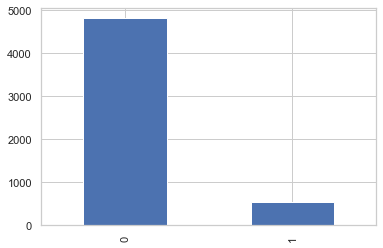

In [385]:
df['PAID_CUSTOMER'].value_counts().plot(kind='bar')

In [386]:
import seaborn as sns

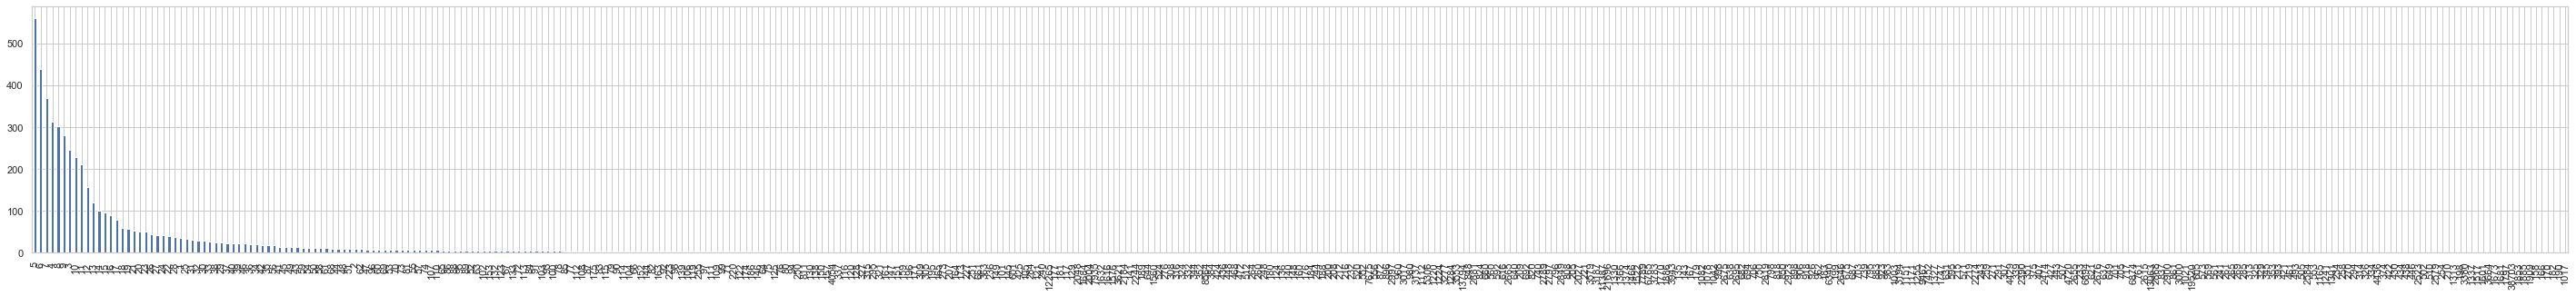

In [387]:

df['Total_EVENTS_COUNTS'].value_counts().plot(kind='bar',figsize=(50,5))

In [388]:
sns.set(style="whitegrid")

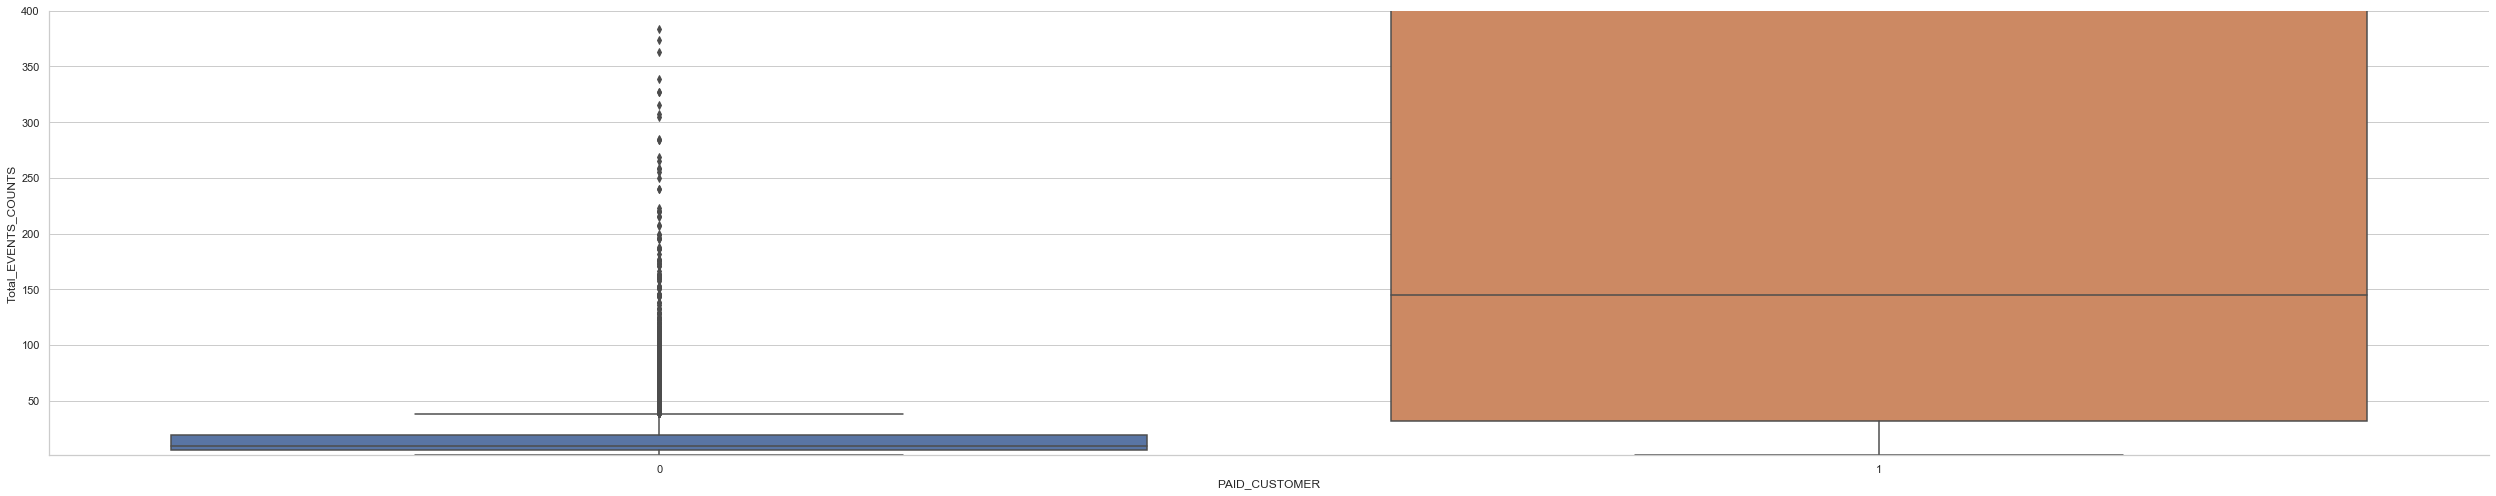

In [389]:
g = sns.catplot(x="PAID_CUSTOMER", y="Total_EVENTS_COUNTS",
                data=df, kind="box",
                height=7, aspect=5);
g.set(ylim=(1,400))

In [390]:
rs=df.corr(method ='pearson') ['PAID_CUSTOMER']

In [391]:
p=pd.DataFrame(data=rs)

In [392]:
p

,PAID_CUSTOMER
organization_id,-0.404496
added_checkin,0.231904
added_comment,0.219066
added_objective,0.295801
average_progress_detail,-0.010691
...,...
clicked_recently_visited_page_in_quick_search,0.018230
Total_EVENTS_COUNTS,0.298706
first_user_sign_up,-0.246568
number_of_users,0.409708


In [393]:
p=p.sort_values(by=['PAID_CUSTOMER'],ascending=False)

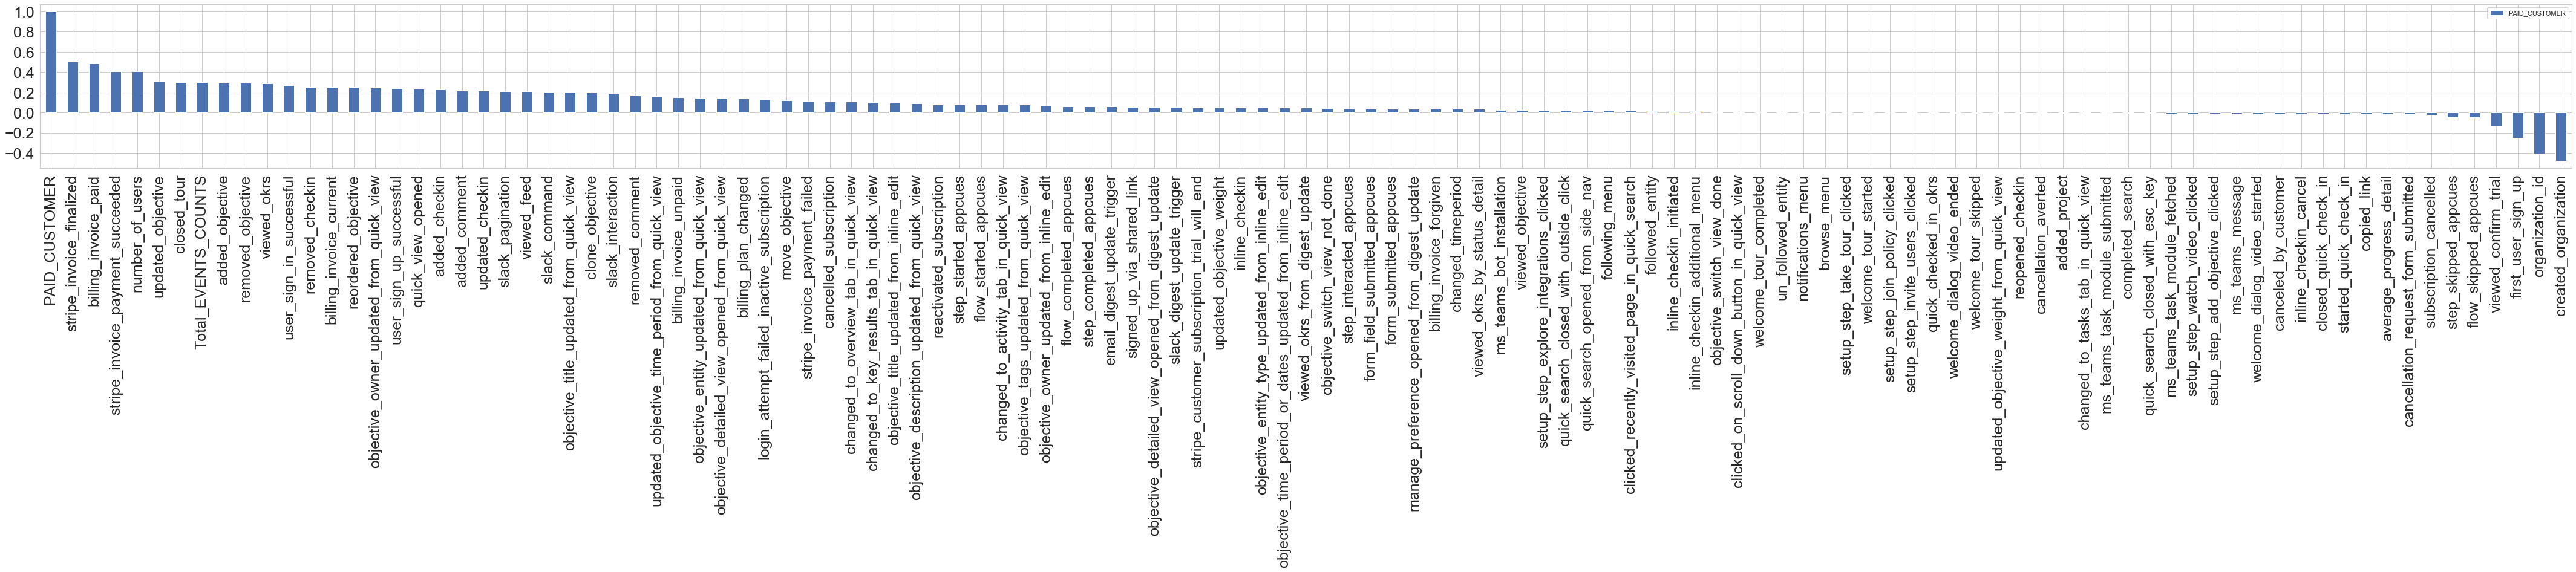

In [394]:
p.plot( y='PAID_CUSTOMER', kind = 'bar',figsize=(75,5),fontsize=25)

In [395]:
p.head(10)

,PAID_CUSTOMER
PAID_CUSTOMER,1.000000
stripe_invoice_finalized,0.505510
billing_invoice_paid,0.486874
stripe_invoice_payment_succeeded,0.410312
number_of_users,0.409708
updated_objective,0.305995
closed_tour,0.303302
Total_EVENTS_COUNTS,0.298706
added_objective,0.295801
removed_objective,0.295236


In [52]:
pf=pd.read_csv(r'F:\pql_final\pqlv3.csv')

In [53]:
pql_df_1

,organization_id,sign_up_timestamp,first_user_sign_up
0,4,2020-02-05 14:35:55.496,73232
1,6,2019-12-11 18:12:58.011,54719
2,114,2020-02-20 18:43:11.331,76124
3,118,2020-01-31 02:39:39.127,72836
4,162,2019-12-08 17:32:12.931,53868
...,...,...,...
5380,10905,2020-07-22 20:29:31.560,97486
5381,10906,2020-07-22 20:40:20.913,97490
5382,10907,2020-07-22 22:16:56.119,97506
5383,10908,2020-07-22 23:13:38.294,97509


In [59]:
pf

,organization_id,added_checkin,added_comment,added_objective,average_progress_detail,billing_invoice_current,billing_invoice_paid,billing_plan_changed,browse_menu,cancellation_request_form_submitted,...,started_quick_check_in,closed_quick_check_in,quick_search_closed_with_esc_key,clicked_recently_visited_page_in_quick_search,Total_EVENTS_COUNTS,sign_up_timestamp,first_user_sign_up,number_of_users,PAID_CUSTOMER,users_within_24_hrs
0,4,38,0,13,0,0,0,0,0,0,...,0,0,0,0,307,35:55.5,73232,2,0,1
1,6,97,0,44,0,0,0,0,0,0,...,0,0,0,0,661,12:58.0,54719,5,1,1
2,114,71,0,140,0,0,5,0,0,0,...,0,0,0,0,1220,43:11.3,76124,1,1,1
3,118,0,0,5,0,0,0,0,0,0,...,0,0,0,0,92,39:39.1,72836,25,1,1
4,162,69,28,253,0,0,0,1,0,0,...,0,0,0,0,2184,32:12.9,53868,27,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5357,10883,0,0,0,0,0,0,1,0,0,...,0,0,0,0,11,27:28.6,97377,1,0,1
5358,10884,0,0,0,0,0,0,1,0,0,...,0,0,0,0,11,47:30.0,97384,1,0,1
5359,10885,0,0,1,0,0,0,1,0,0,...,0,0,0,0,20,07:08.2,97393,1,0,1
5360,10886,0,0,0,0,0,0,1,0,0,...,0,0,0,0,18,37:05.2,97395,1,0,1


In [60]:
orgs=pf['organization_id'].unique()

In [61]:
x=[]
for i in range(0,len(orgs)):
    x.append(pql_df_1[pql_df_1['organization_id']==orgs[i]]['sign_up_timestamp'].values[0])
    

In [62]:
len(x)

5362

In [63]:
pf['sign_up_timestamp']=x

In [64]:
pf

,organization_id,added_checkin,added_comment,added_objective,average_progress_detail,billing_invoice_current,billing_invoice_paid,billing_plan_changed,browse_menu,cancellation_request_form_submitted,...,started_quick_check_in,closed_quick_check_in,quick_search_closed_with_esc_key,clicked_recently_visited_page_in_quick_search,Total_EVENTS_COUNTS,sign_up_timestamp,first_user_sign_up,number_of_users,PAID_CUSTOMER,users_within_24_hrs
0,4,38,0,13,0,0,0,0,0,0,...,0,0,0,0,307,2020-02-05 14:35:55.496,73232,2,0,1
1,6,97,0,44,0,0,0,0,0,0,...,0,0,0,0,661,2019-12-11 18:12:58.011,54719,5,1,1
2,114,71,0,140,0,0,5,0,0,0,...,0,0,0,0,1220,2020-02-20 18:43:11.331,76124,1,1,1
3,118,0,0,5,0,0,0,0,0,0,...,0,0,0,0,92,2020-01-31 02:39:39.127,72836,25,1,1
4,162,69,28,253,0,0,0,1,0,0,...,0,0,0,0,2184,2019-12-08 17:32:12.931,53868,27,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5357,10883,0,0,0,0,0,0,1,0,0,...,0,0,0,0,11,2020-07-21 20:27:28.621,97377,1,0,1
5358,10884,0,0,0,0,0,0,1,0,0,...,0,0,0,0,11,2020-07-21 21:47:30.019,97384,1,0,1
5359,10885,0,0,1,0,0,0,1,0,0,...,0,0,0,0,20,2020-07-22 02:07:08.175,97393,1,0,1
5360,10886,0,0,0,0,0,0,1,0,0,...,0,0,0,0,18,2020-07-22 03:37:05.199,97395,1,0,1


In [57]:
pql_df_1

,organization_id,sign_up_timestamp,first_user_sign_up
0,4,2020-02-05 14:35:55.496,73232
1,6,2019-12-11 18:12:58.011,54719
2,114,2020-02-20 18:43:11.331,76124
3,118,2020-01-31 02:39:39.127,72836
4,162,2019-12-08 17:32:12.931,53868
...,...,...,...
5397,10922,2020-07-23 16:27:34.883,97596
5398,10924,2020-07-23 16:57:31.381,97605
5399,10925,2020-07-23 17:42:33.429,97608
5400,10926,2020-07-23 19:41:23.305,97784


In [70]:
pf.to_excel("pql_signup_date.xlsx")  

In [66]:
pickle_out = open("F:\df.pickle","wb")
pickle.dump(pf, pickle_out)
pickle_out.close()

In [69]:
pf

,organization_id,added_checkin,added_comment,added_objective,average_progress_detail,billing_invoice_current,billing_invoice_paid,billing_plan_changed,browse_menu,cancellation_request_form_submitted,...,started_quick_check_in,closed_quick_check_in,quick_search_closed_with_esc_key,clicked_recently_visited_page_in_quick_search,Total_EVENTS_COUNTS,sign_up_timestamp,first_user_sign_up,number_of_users,PAID_CUSTOMER,users_within_24_hrs
0,4,38,0,13,0,0,0,0,0,0,...,0,0,0,0,307,2020-02-05 14:35:55.496,73232,2,0,1
1,6,97,0,44,0,0,0,0,0,0,...,0,0,0,0,661,2019-12-11 18:12:58.011,54719,5,1,1
2,114,71,0,140,0,0,5,0,0,0,...,0,0,0,0,1220,2020-02-20 18:43:11.331,76124,1,1,1
3,118,0,0,5,0,0,0,0,0,0,...,0,0,0,0,92,2020-01-31 02:39:39.127,72836,25,1,1
4,162,69,28,253,0,0,0,1,0,0,...,0,0,0,0,2184,2019-12-08 17:32:12.931,53868,27,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5357,10883,0,0,0,0,0,0,1,0,0,...,0,0,0,0,11,2020-07-21 20:27:28.621,97377,1,0,1
5358,10884,0,0,0,0,0,0,1,0,0,...,0,0,0,0,11,2020-07-21 21:47:30.019,97384,1,0,1
5359,10885,0,0,1,0,0,0,1,0,0,...,0,0,0,0,20,2020-07-22 02:07:08.175,97393,1,0,1
5360,10886,0,0,0,0,0,0,1,0,0,...,0,0,0,0,18,2020-07-22 03:37:05.199,97395,1,0,1
